# **Importation des données**

In [30]:
import pandas as pd
data=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
data.shape

(5110, 12)

# **Matrice de corrélation :**

<ipython-input-32-6f36abe93a04>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


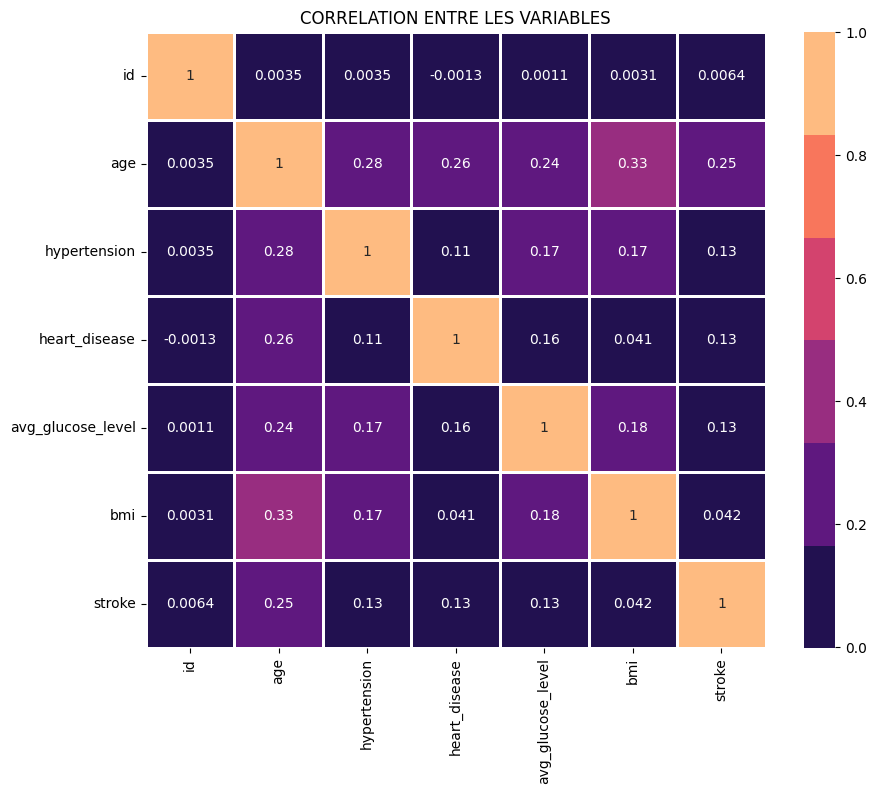

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION ENTRE LES VARIABLES")
plt.show()

**Nous pouvons remarquer qu'il existe une petite corrélation entre l'attribut "Age" et "bmi"
--- Pour bien visualiser le type de la relation entre ces deux attributs, nous allons afficher le graphe suivant:**

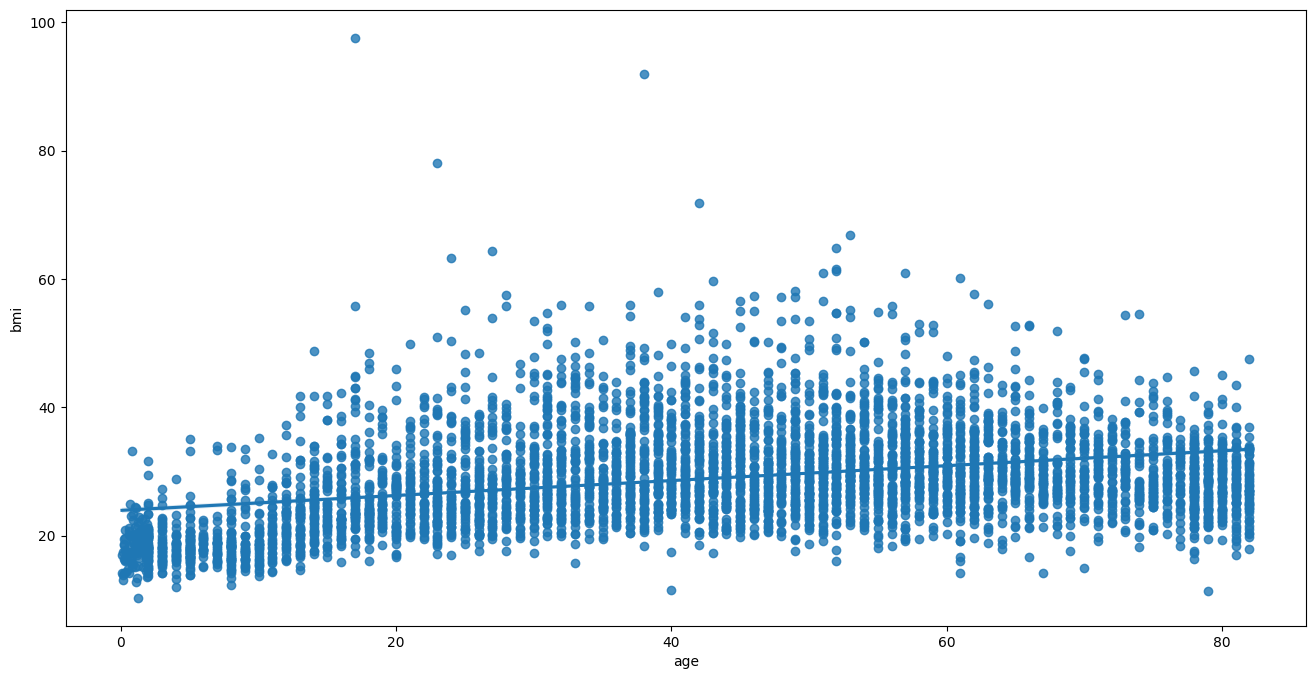

In [33]:
plt.figure(figsize=(16, 8))
sns.regplot(x = "age", y = "bmi", data = data)
plt.show()

**Nous remarquons que comme l'âge augmente, ainsi fait l'indice de masse corporelle.**

# **Visualisation des attributs en fonction de l'AVC :**

In [34]:
#D'abord nous allons classer  les valeurs de l'attribut "age" en intervalles pour bien visualiser sa relation avec la probabilité d'avoir l'AVC.
import numpy as np

ranges = [0, 18, 30, 40, 50, 60, 70, np.inf]
labels = ['0-18','18-30', '30-40', '40-50', '50-60', '60-70', '70+']

ages = pd.cut(data['age'], bins=ranges, labels=labels)

Text(0.5, 1.0, 'smoking status')

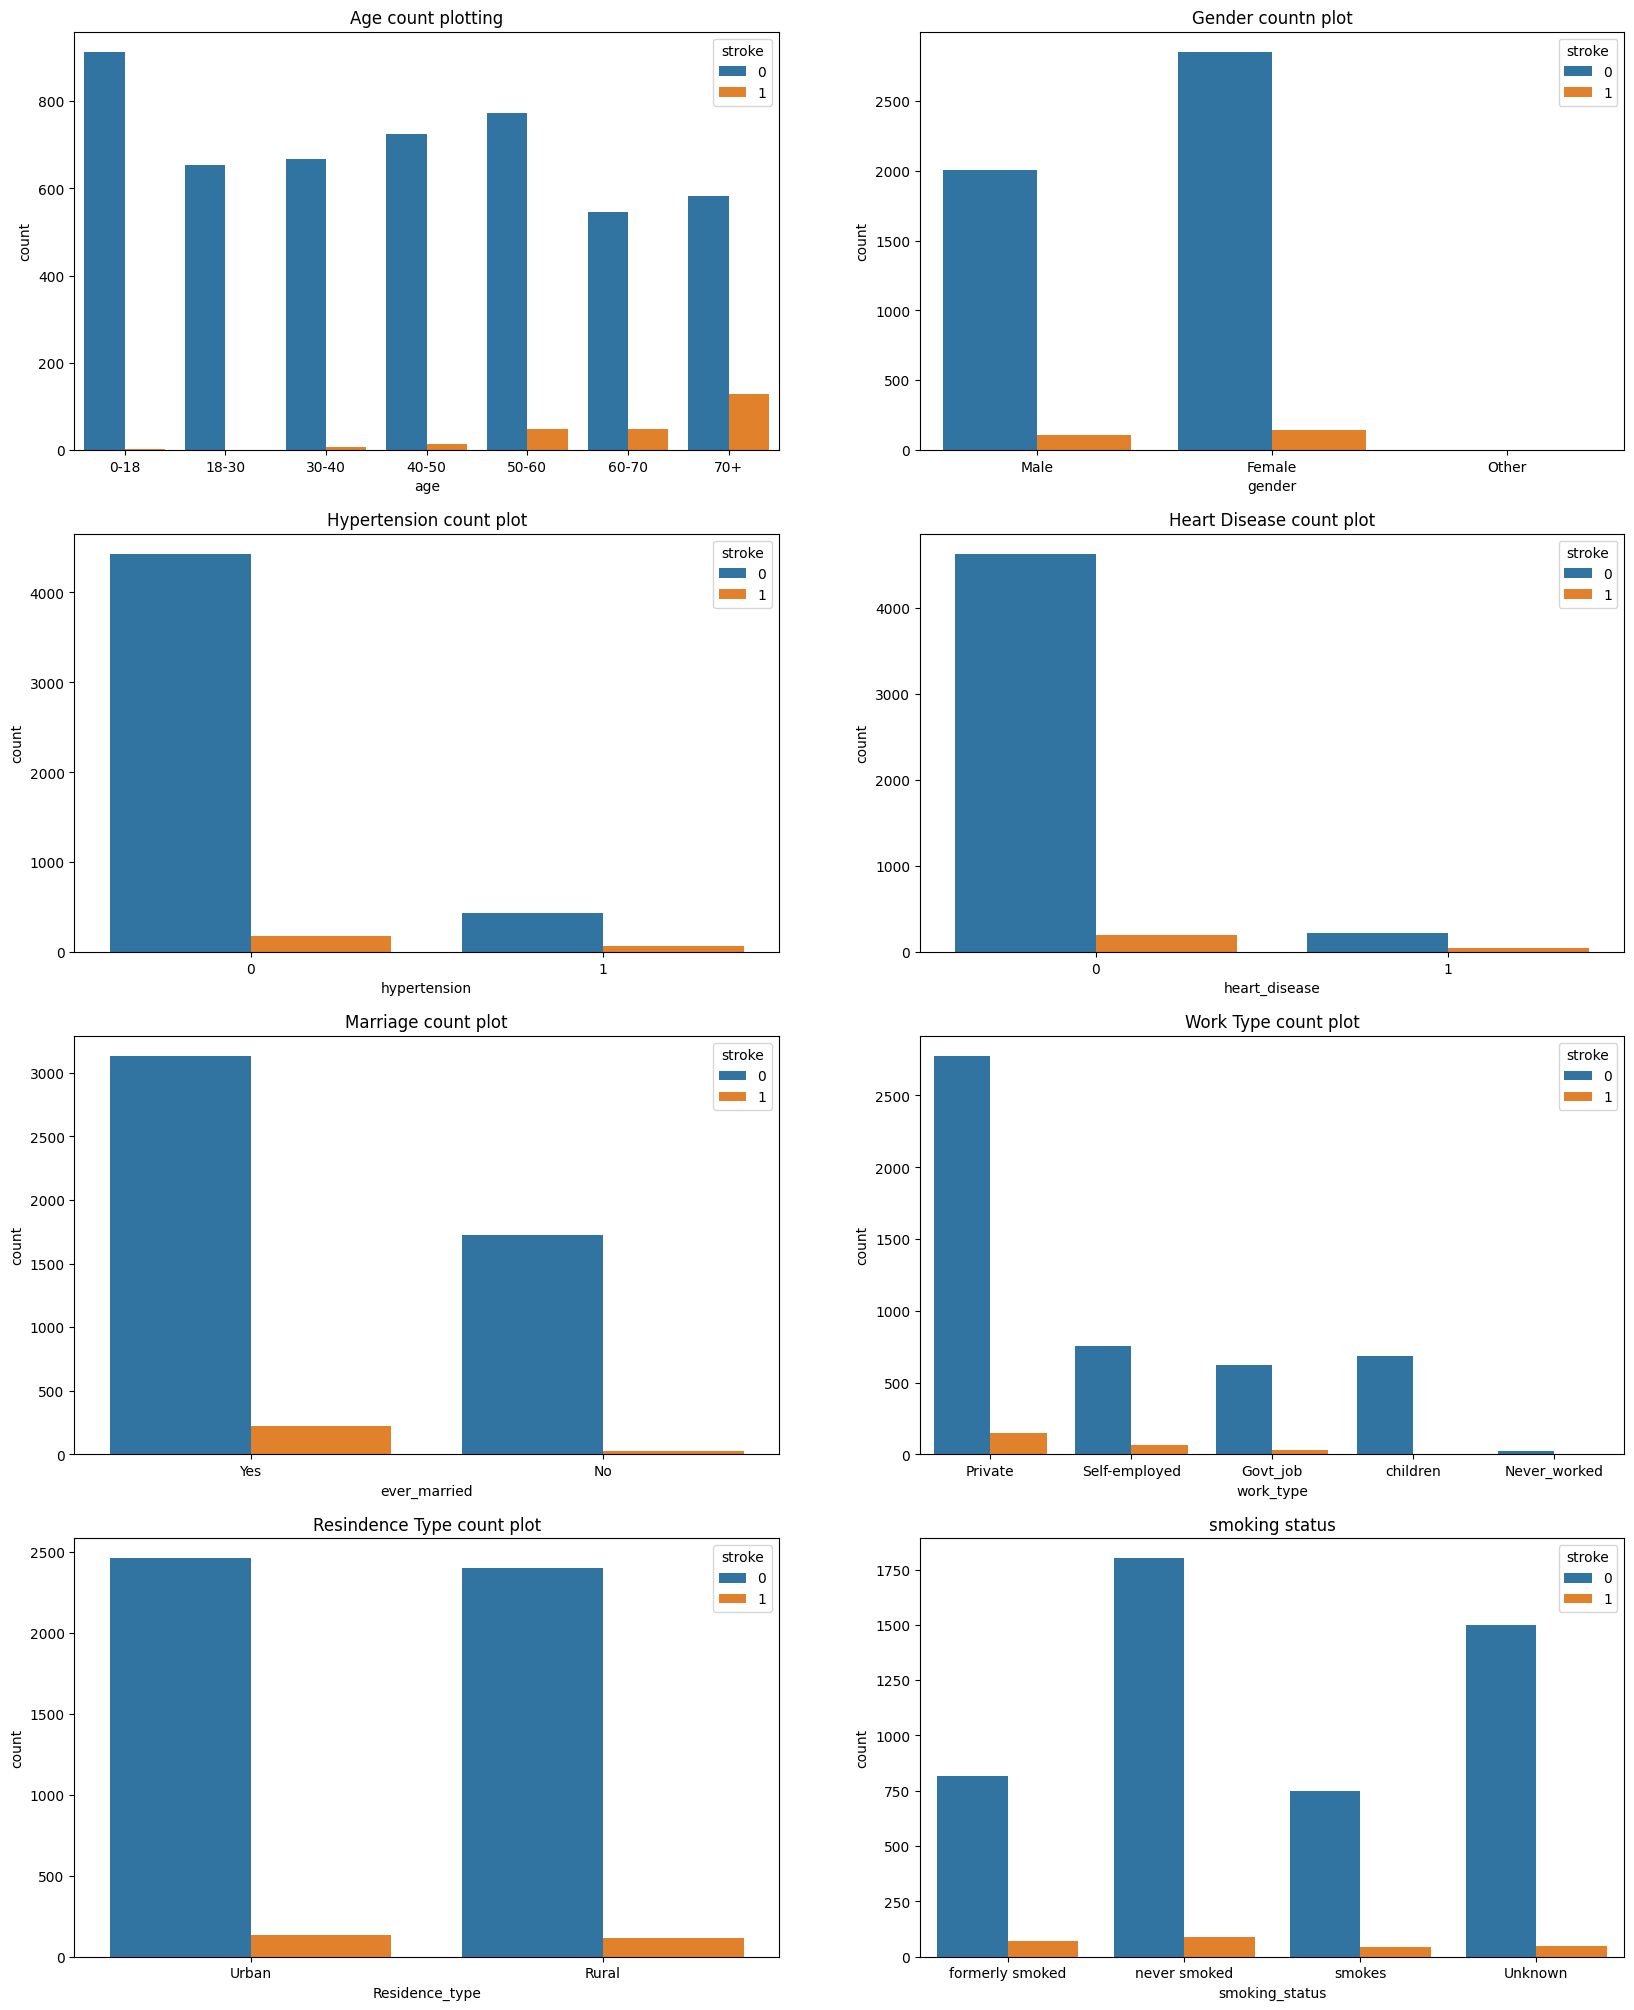

In [35]:
fig, axes = plt.subplots(4, 2, figsize=(20, 25))

sns.countplot(ax=axes[0,0], x= ages ,hue='stroke',data=data).set_title('Age count plotting')
sns.countplot(ax=axes[0,1], x='gender',hue='stroke',data=data).set_title('Gender countn plot')
sns.countplot(ax=axes[1,0], x='hypertension',hue='stroke',data=data).set_title('Hypertension count plot')
sns.countplot(ax=axes[1,1], x='heart_disease',hue='stroke',data=data).set_title('Heart Disease count plot')
sns.countplot(ax=axes[2,0], x='ever_married',hue='stroke',data=data).set_title('Marriage count plot')
sns.countplot(ax=axes[2,1], x='work_type',hue='stroke',data=data).set_title('Work Type count plot')
sns.countplot(ax=axes[3,0], x='Residence_type',hue='stroke',data=data).set_title('Resindence Type count plot')
sns.countplot(ax=axes[3,1], x='smoking_status',hue='stroke',data=data).set_title('smoking status')

# **Unbalanced Dataset :**

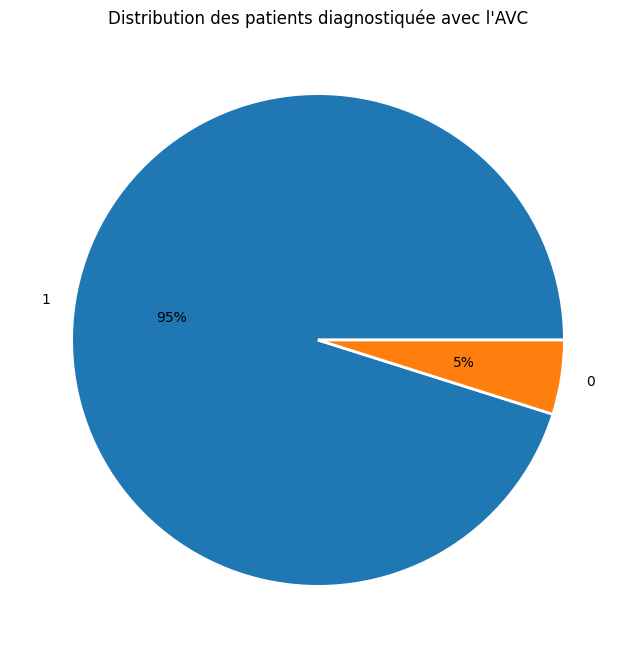

In [36]:
plt.figure(figsize=(12,8))
plt.pie(data["stroke"].value_counts().values, labels=data["stroke"].unique(), autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("Distribution des patients diagnostiquée avec l'AVC")
plt.show()

**on remarque que les données sont déséquilibrées.**

# **Préparation des données.**

**On effectue un prétraitement des données. On supprime les données manquantes, on supprime la colonne id qui ne nous intérsse pas et on encode les données non numériques.**

In [37]:
data=data.dropna() #Suppression des données manquantes

data=data.drop('id',axis=1) #Suppression de la colonne id

#On affecte la moyenne du 'bmi' au valeurs manquantes de cet attribut
mean_bmi = data['bmi'].mean()
data = data.fillna(mean_bmi)

#arrondir le type des valeurs dans l’attribut "age" est Float

data['age'] = data['age'].apply(lambda x: round(x))

from sklearn.preprocessing import LabelEncoder #Pour encoder les variables non numériques
le=LabelEncoder() #On fait un encodage par label

#On encode les colonnes non numériques
data['gender']=le.fit_transform(data['gender'])
data['ever_married']=le.fit_transform(data['ever_married'])
data['work_type']=le.fit_transform(data['work_type'])
data['Residence_type']=le.fit_transform(data['Residence_type'])
data['smoking_status']=le.fit_transform(data['smoking_status'])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.6,1,1
2,1,80,0,1,1,2,0,105.92,32.5,2,1
3,0,49,0,0,1,2,1,171.23,34.4,3,1
4,0,79,1,0,1,3,0,174.12,24.0,2,1
5,1,81,0,0,1,2,1,186.21,29.0,1,1


**On extrait les features et les labels.**

In [38]:
y=data['stroke'] #Labels
data.drop(columns=['stroke'], inplace=True) #Features

# **l'undersampling ou le sous-échantillonnage**

In [39]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=2, n_neighbors=3)
x, y = undersample.fit_resample(data, y)

In [40]:
from sklearn.preprocessing import StandardScaler
# Normaliser les caractéristiques
scaler = StandardScaler()
x = scaler.fit_transform(x)

**On regarde la distribution des labels.**

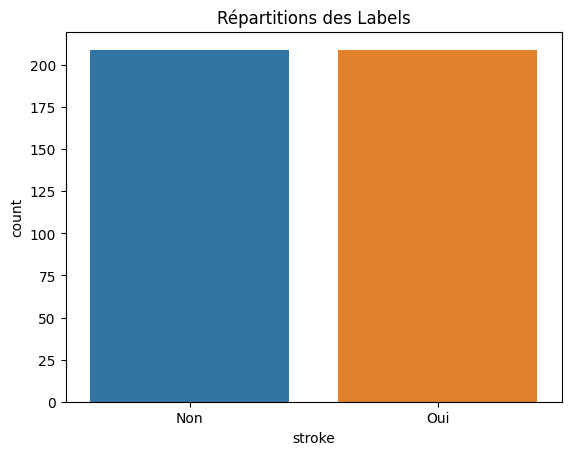

In [41]:
import warnings

# Ignorer les avertissements
warnings.filterwarnings('ignore')

# Créer un diagramme en barres vertical
sns.countplot(x=y)  # Utilisation de 'x' au lieu de 'y' pour un diagramme en barres vertical
plt.xticks([0, 1], ['Non', 'Oui'])
plt.title('Répartitions des Labels')

# Afficher le graphique
plt.show()

**On peut voir qu'on a peu de données "oui" (le cas ou une personne a fait AVC). Il faudra donc faire attention à l'interprétations des résultats et aux données quand on les divisera en jeu d'apprentissage et un jeu de test.**

# **Splitting Dataset**

In [42]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

**Regardons si on a une bonne répartitions des labels entre le data_train et data_test.**

Text(0.5, 1.0, 'Répartitions des Labels pour y_train')

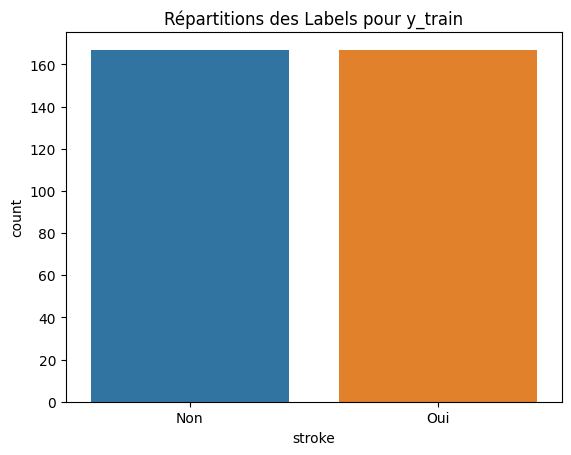

In [43]:
sns.countplot(x=y_train)
plt.xticks([0,1],['Non','Oui'])
plt.title('Répartitions des Labels pour y_train')

Text(0.5, 1.0, 'Répartitions des Labels pour y_test')

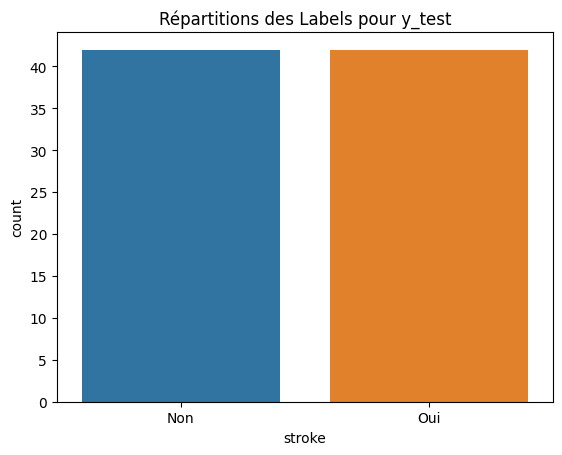

In [44]:
sns.countplot(x=y_test)
plt.xticks([0,1],['Non','Oui'])
plt.title('Répartitions des Labels pour y_test')

**On voit que l'on à une bonne répartitions, maintenant on passe à la création de notre réseau.**

#**Création d'un LSTM**

In [45]:
# Remodeler les données pour les séquences LSTM
timesteps = 1
features = x_train.shape[1]
x_train = x_train.reshape((x_train.shape[0], timesteps, features))
x_test = x_test.reshape((x_test.shape[0], timesteps, features))

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Construire le modèle LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(timesteps, features)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
# Entraîner le modèle
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
11/11 [==============================] - 2s 32ms/step - loss: 0.6955 - accuracy: 0.5269 - val_loss: 0.6543 - val_accuracy: 0.6310
Epoch 2/30
11/11 [==============================] - 0s 8ms/step - loss: 0.6476 - accuracy: 0.5898 - val_loss: 0.6212 - val_accuracy: 0.6786
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 0.6112 - accuracy: 0.6677 - val_loss: 0.5906 - val_accuracy: 0.6905
Epoch 4/30
11/11 [==============================] - 0s 7ms/step - loss: 0.5804 - accuracy: 0.7186 - val_loss: 0.5610 - val_accuracy: 0.7500
Epoch 5/30
11/11 [==============================] - 0s 7ms/step - loss: 0.5528 - accuracy: 0.7335 - val_loss: 0.5353 - val_accuracy: 0.7619
Epoch 6/30
11/11 [==============================] - 0s 6ms/step - loss: 0.5288 - accuracy: 0.7515 - val_loss: 0.5128 - val_accuracy: 0.7738
Epoch 7/30
11/11 [==============================] - 0s 6ms/step - loss: 0.5066 - accuracy: 0.7754 - val_loss: 0.4936 - val_accuracy: 0.8095
Epoch 8/30
11/11 [=

In [73]:
# Évaluer le modèle
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

3/3 [==============================] - 0s 5ms/step - loss: 0.2226 - accuracy: 0.9167
Accuracy: 91.67%


In [74]:
from sklearn.metrics import confusion_matrix #Pour les résultats sur le test set
y_pred=[]
for i in model.predict(x_test):
    if i>0.5:
        y_pred.append(1)
    if i<0.5:
        y_pred.append(0)

print("Matrice de confusion : \n",confusion_matrix(y_test,y_pred))

3/3 [==============================] - 0s 4ms/step
Matrice de confusion : 
 [[39  3]
 [ 4 38]]


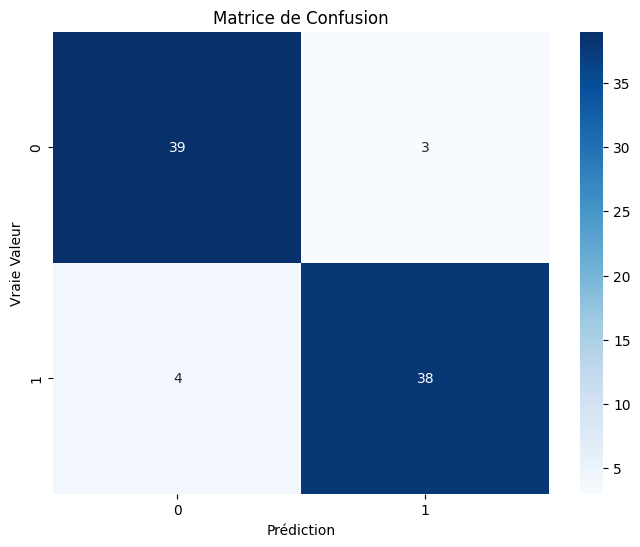

In [75]:
#Affichage

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualiser la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.show()

#**Création d'un RNN**

In [61]:
from tensorflow.keras.layers import SimpleRNN

modelRNN = Sequential()
modelRNN.add(SimpleRNN(32))
modelRNN.add(Dense(10, activation='relu'))
modelRNN.add(Dense(1, activation='sigmoid'))
modelRNN.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [63]:
# Entraîner le modèle
modelRNN.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
11/11 [==============================] - 1s 47ms/step - loss: 0.5386 - accuracy: 0.8084 - val_loss: 0.5427 - val_accuracy: 0.7381
Epoch 2/30
11/11 [==============================] - 0s 28ms/step - loss: 0.5235 - accuracy: 0.8054 - val_loss: 0.5243 - val_accuracy: 0.7381
Epoch 3/30
11/11 [==============================] - 0s 25ms/step - loss: 0.5087 - accuracy: 0.8054 - val_loss: 0.5068 - val_accuracy: 0.7500
Epoch 4/30
11/11 [==============================] - 0s 15ms/step - loss: 0.4926 - accuracy: 0.8144 - val_loss: 0.4883 - val_accuracy: 0.7738
Epoch 5/30
11/11 [==============================] - 0s 15ms/step - loss: 0.4771 - accuracy: 0.8234 - val_loss: 0.4683 - val_accuracy: 0.8095
Epoch 6/30
11/11 [==============================] - 0s 18ms/step - loss: 0.4605 - accuracy: 0.8263 - val_loss: 0.4492 - val_accuracy: 0.8214
Epoch 7/30
11/11 [==============================] - 0s 25ms/step - loss: 0.4442 - accuracy: 0.8234 - val_loss: 0.4305 - val_accuracy: 0.8333
Epoch 8/30
11

In [64]:
# Évaluer le modèle
loss, accuracy = modelRNN.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

3/3 [==============================] - 0s 19ms/step - loss: 0.1834 - accuracy: 0.9643
Accuracy: 96.43%


In [70]:
y_predRNN = modelRNN.predict(x_test)

3/3 [==============================] - 0s 6ms/step


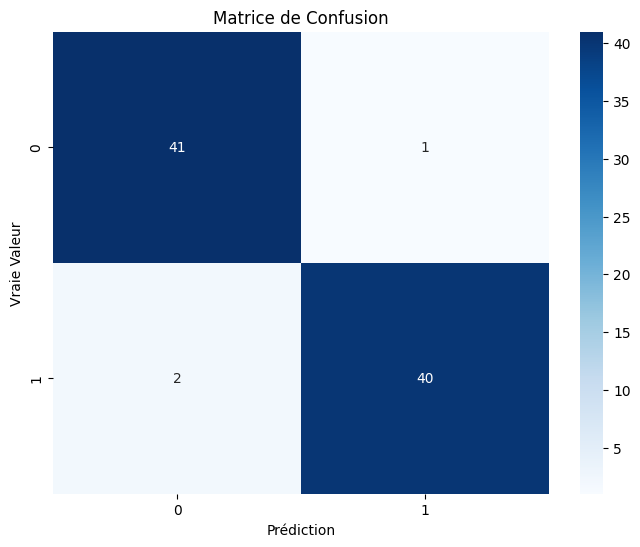

In [71]:
#Affichage

# Créer la matrice de confusion
y_predRNN = np.round(y_predRNN)

conf_matrix = confusion_matrix(y_test, y_predRNN)

# Visualiser la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.show()